In [1]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# URL pro raw csv que ta no git
url = 'datasets/myo-movendo-luiza-2019-05-02 12:11:37-.csv'
# Dataset is now stored in a Pandas Dataframe

#Pandas dataset
Dataset = pd.read_csv(url)
#Normaliza e transforma em numpy array
Normalized_Data = preprocessing.normalize(Dataset)

print("Original Dataset")
print (Dataset.head())


print("\n\nNormalized Dataset")
print (Normalized_Data)


# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
Scaled_Data = scaler.fit_transform(Dataset)
Scaled_Data = pd.DataFrame(Scaled_Data)

print("\n\nScaled Dataset")
print (Scaled_Data.head)

Original Dataset
   Unnamed: 0     Timestamp  Sensor 0  Sensor 1  Sensor 2  Sensor 3  Sensor 4  \
0           0  1.556810e+09     149.0     207.0     258.0     275.0     366.0   
1           1  1.556810e+09     162.0     107.0     255.0     246.0     355.0   
2           2  1.556810e+09     162.0     107.0     255.0     246.0     355.0   
3           3  1.556810e+09     173.0      99.0     248.0     248.0     360.0   
4           4  1.556810e+09     173.0      99.0     248.0     248.0     360.0   

   Sensor 5  Sensor 6  Sensor 7  Gyro 0  Gyro 1  Gyro 2   Acc 1   Acc 2  Acc 3  
0     381.0     393.0     163.0  1933.0 -4578.0   894.0 -1041.0 -2668.0 -148.0  
1     398.0     330.0     152.0  1933.0 -4578.0   894.0 -1041.0 -2668.0 -148.0  
2     398.0     330.0     152.0  2335.0 -5089.0   753.0  -978.0 -2311.0   43.0  
3     400.0     279.0     151.0  2335.0 -5089.0   753.0  -978.0 -2311.0   43.0  
4     400.0     279.0     151.0  2451.0 -5344.0   509.0  -936.0 -1874.0  169.0  


Normaliz

/home/mois/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mois/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
Dataset["Variance"] = Dataset.var(axis=1)
Dataset["Mean"] = Dataset.mean(axis=1)
print("Mean")
print(Dataset.get("Variance").head(10))

print("\nVariance")
print(Dataset.get("Mean").head(10))


Mean
0    1.514786e+17
1    1.514786e+17
2    1.514786e+17
3    1.514786e+17
4    1.514786e+17
5    1.514786e+17
6    1.514786e+17
7    1.514786e+17
8    1.514786e+17
9    1.514786e+17
Name: Variance, dtype: float64

Variance
0    8.910506e+15
1    8.910506e+15
2    8.910506e+15
3    8.910506e+15
4    8.910506e+15
5    8.910506e+15
6    8.910506e+15
7    8.910506e+15
8    8.910506e+15
9    8.910506e+15
Name: Mean, dtype: float64


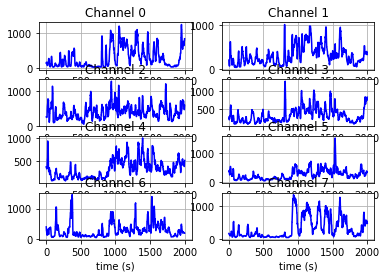

In [4]:
ax = np.linspace(0,2000,2000,endpoint=True)
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("time (s)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(ax, l,"blue")
    plt.grid()

plt.draw()
plt.show()

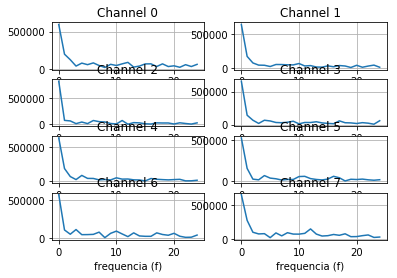

In [5]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("frequencia (f)")
    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.plot(abs(np.fft.rfft(l)[:25]))
    plt.grid()

plt.draw()
plt.show()

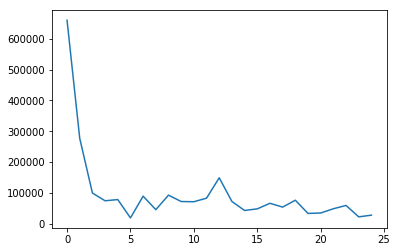

In [6]:
plt.plot(abs(np.fft.rfft(l)[:25]))

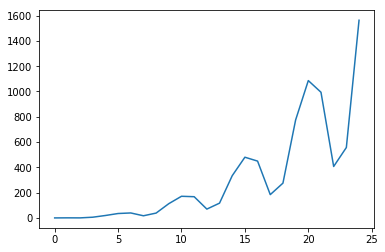

In [7]:
s = abs(np.fft.rfft(l))

# Configuration.
fS = 50  # Sampling rate.
fH = 5  # Cutoff frequency.
N = 115  # Filter length, must be odd.
h = np.sinc(2 * fH / fS * (np.arange(N) - (N - 1) / 2)) # Compute sinc filter.
h *= np.blackman(N) # Apply window.
h /= np.sum(h) # Normalize to get unity gain.
h = -h # Create a high-pass filter from the low-pass filter through spectral inversion.
h[(N - 1) // 2] += 1


s = np.convolve(s, h)
plt.plot(abs(s)[:25])

(array([[7.71699241e+04, 6.09420781e+04, 6.27135930e+04, ...,
         6.12018867e+05, 1.04848306e+06, 1.16307430e+05],
        [4.56521868e+04, 4.63596478e+04, 4.60964037e+04, ...,
         1.50685964e+05, 6.79460603e+05, 6.16203903e+04],
        [5.37967066e+03, 1.23167339e+04, 6.51862418e+03, ...,
         1.47058088e+05, 3.88189509e+02, 6.20346890e+03],
        ...,
        [6.22460513e+00, 7.73658599e+00, 3.42894283e+00, ...,
         5.97243171e+01, 1.10815334e+01, 7.34937384e-01],
        [1.67203651e-01, 1.69398081e+00, 1.24126462e+00, ...,
         3.32368577e+01, 6.46365259e+00, 1.23007817e-01],
        [1.19776153e-01, 1.02198177e-02, 8.75851599e-03, ...,
         7.99810607e+00, 9.32366184e+00, 1.11100044e-01]]),
 array([ 0.       ,  0.1953125,  0.390625 ,  0.5859375,  0.78125  ,
         0.9765625,  1.171875 ,  1.3671875,  1.5625   ,  1.7578125,
         1.953125 ,  2.1484375,  2.34375  ,  2.5390625,  2.734375 ,
         2.9296875,  3.125    ,  3.3203125,  3.515625 ,  3.71

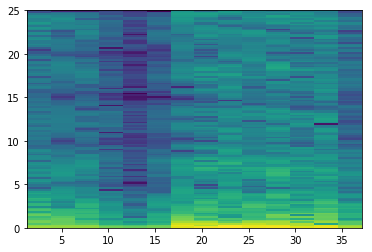

In [8]:
plt.specgram(l,Fs=50)

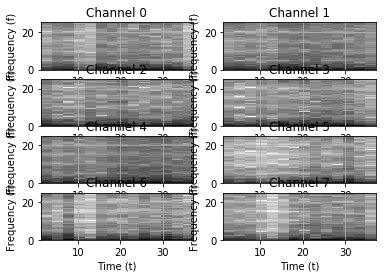

In [9]:
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.title("Channel "+str(i))
    plt.xlabel("Time (t)")
    plt.ylabel("Frequency (f)")

    column = "Sensor "+str(i)
    l = list(Dataset.get(column))
    plt.specgram(l,Fs=50,cmap=plt.cm.gray_r)
    plt.grid()

plt.draw()
plt.show()

## Feature selection
https://machinelearningmastery.com/feature-selection-machine-learning-python/

PCA - Principal Component Analysis

In [10]:
from sklearn.decomposition import PCA
X = Dataset.values[:][2:]
pca = PCA(n_components=4)
fit = pca.fit(X)
print("Explained Variance: ", fit.explained_variance_ratio_)
# print(fit.components_)

Explained Variance:  [1.00000000e+00 2.82417413e-15 1.01405046e-15 6.89684469e-16]


A taxa de variancia vai diminuindo a medida que os elementos vão perdendo a importância. porém isso pode ser causado por nao termos o sinal anotado, assim nao podendo separar os grupos

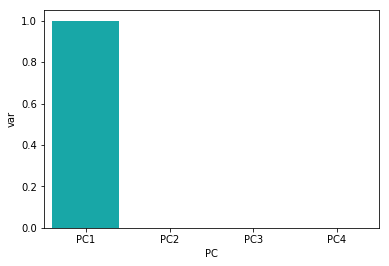

In [11]:
import seaborn as sns
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=df, color="c");

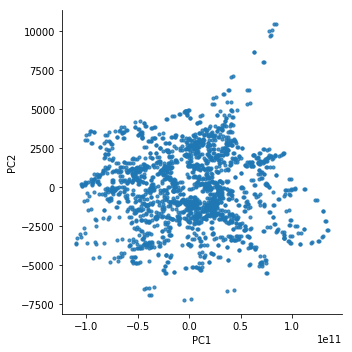

In [12]:
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df.head()
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 10}) # specify the point size

## Feature extraction
https://librosa.github.io/librosa/feature.html

Librosa - é uma biblioteca para se trabalhar com audio, mas o nosso sinal pode ser trabalhado de forma análoga 